In [1]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Données avant traitement

In [2]:
df = pd.read_csv('data/final_scrapped_immobiliers.csv')

print(df.head())

print(df.describe())

       Région Localisation Type de bien    Nature  Superficie  \
0      Ariana       Ariana        villa  À Vendre       320.0   
1      Nabeul       Nabeul       Maison  À Vendre       197.0   
2  La Manouba   La_Manouba       Maison  À Vendre       300.0   
3      Ariana       Ariana        villa  À Vendre       517.0   
4      Nabeul       Nabeul        villa  À Vendre       485.0   

   Salles de bains Chambres       Prix Date_De_Modification  \
0              3.0        5   530000.0                  NaN   
1              1.0        2   240000.0                  NaN   
2              1.0        3       85.0           2024-12-17   
3              3.0        5  1150000.0           2024-12-17   
4              4.0        4   890000.0           2024-12-17   

                                             Annonce  
0                            Villa a vendre a Soukra  
1  A vendre une belle maison S+2 située aux envir...  
2                    maison a el hafsia borj el amri  
3  A vendr

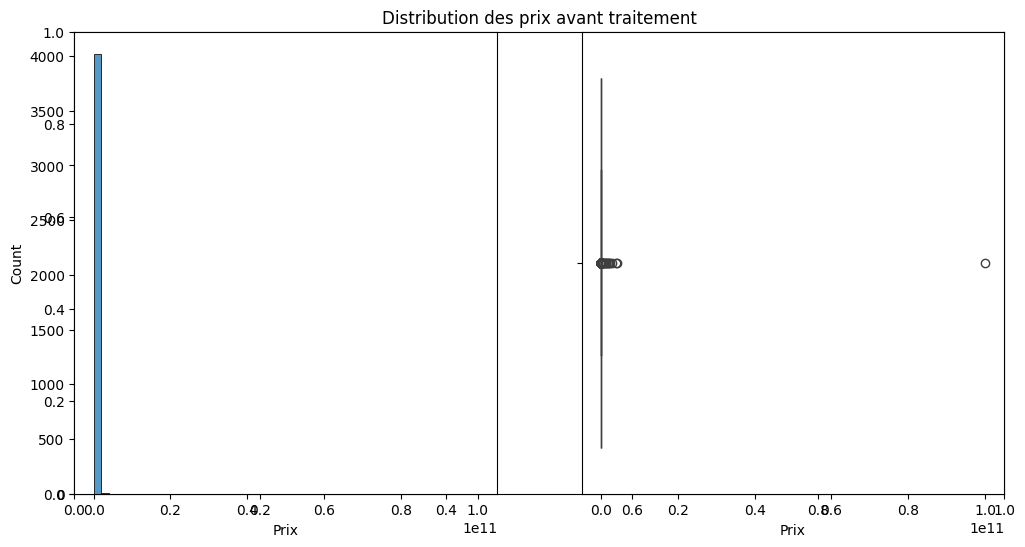

In [3]:
df['Prix'] = pd.to_numeric(df['Prix'], errors='coerce')
df.dropna(subset=['Prix'], inplace=True)
plt.figure(figsize=(12, 6))
plt.title('Distribution des prix avant traitement')

# Histogram for 'Prix'
plt.subplot(1, 2, 1)
sns.histplot(df['Prix'], kde=False, bins=50)

# Boxplot for 'Prix'
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Prix'])

plt.show()

<Axes: xlabel='Superficie'>

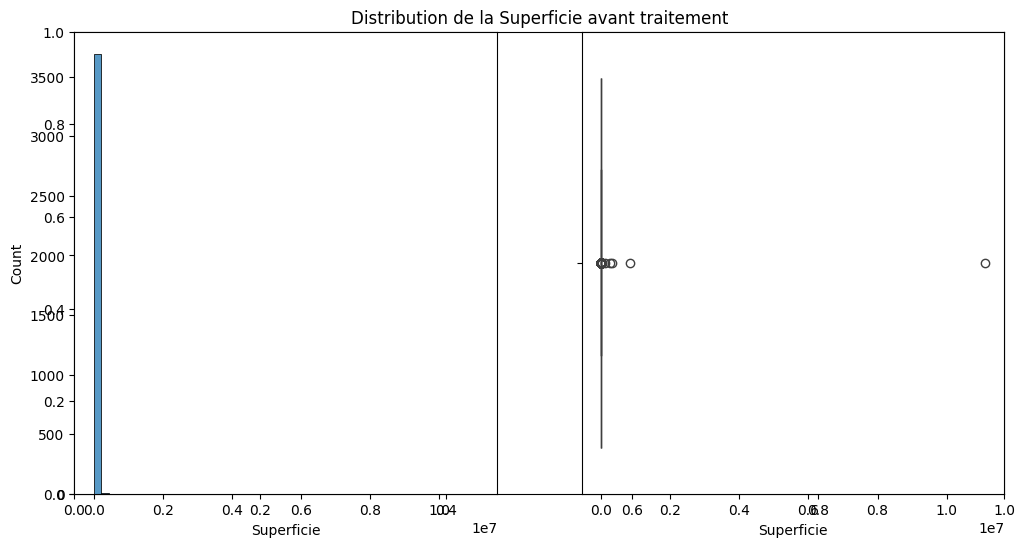

In [4]:
plt.figure(figsize=(12, 6))
plt.title('Distribution de la Superficie avant traitement')

# Histogram for 'Superficie'
plt.subplot(1, 2, 1)
sns.histplot(df['Superficie'], kde=False, bins=50)

# Boxplot for 'Superficie'
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Superficie'])

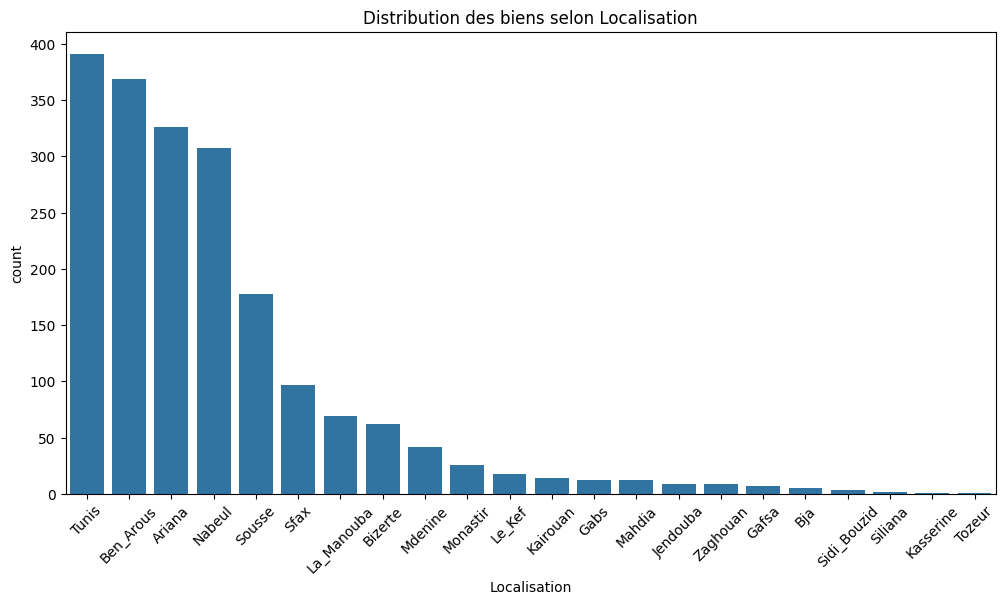

In [5]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Localisation', data=df, order=df['Localisation'].value_counts().index[:])
plt.title('Distribution des biens selon Localisation')
plt.xticks(rotation=45)
plt.show()

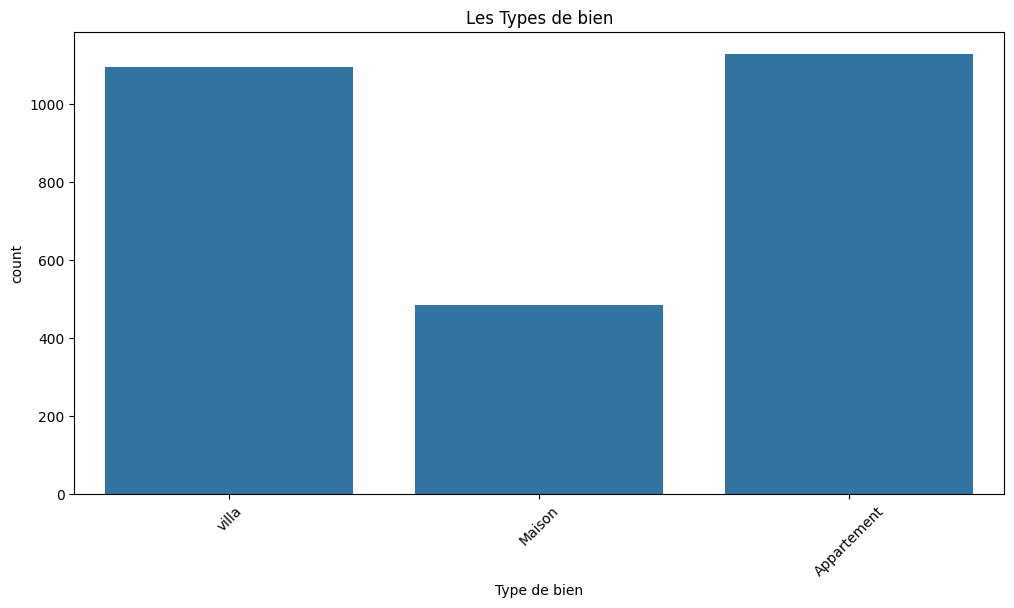

In [8]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Type de bien', data=df)
plt.title('Les Types de bien')
plt.xticks(rotation=45)
plt.show()

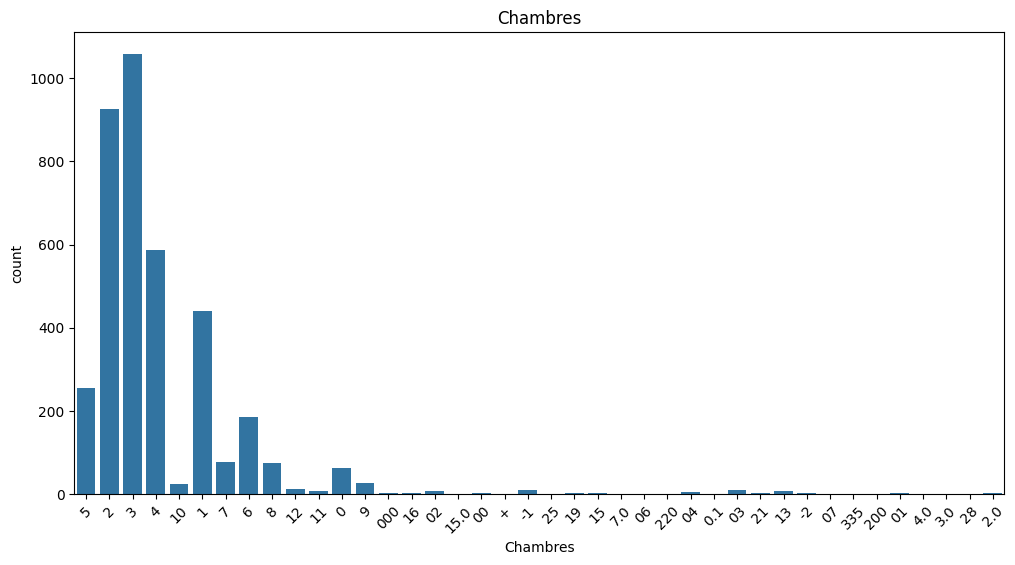

In [10]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Chambres', data=df)
plt.title('Chambres')
plt.xticks(rotation=45)
plt.show()

Données après traitement

In [11]:
df_cleaned = pd.read_csv('data/final_data.csv')

<Axes: xlabel='Prix'>

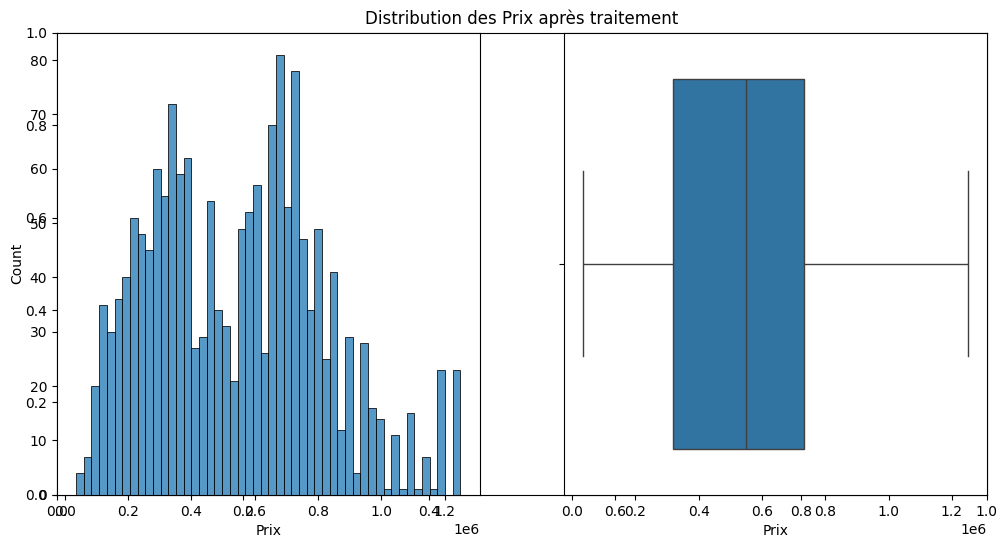

In [12]:
plt.figure(figsize=(12, 6))
plt.title('Distribution des Prix après traitement')

# Histogram for 'Prix'
plt.subplot(1, 2, 1)
sns.histplot(df_cleaned['Prix'], kde=False, bins=50)

# Boxplot for 'Prix'
plt.subplot(1, 2, 2)
sns.boxplot(x=df_cleaned['Prix'])

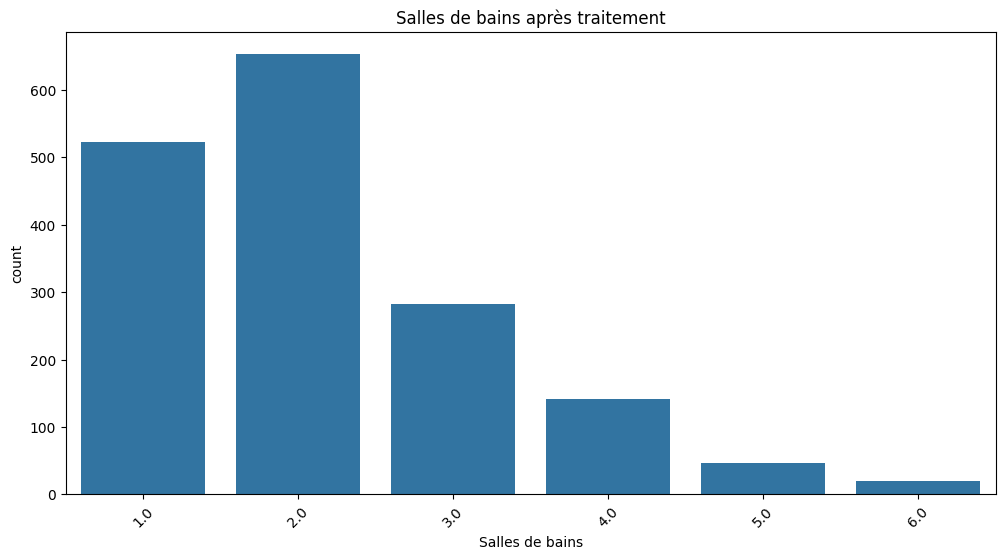

In [13]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Salles de bains', data=df_cleaned)
plt.title('Salles de bains après traitement')
plt.xticks(rotation=45)
plt.show()

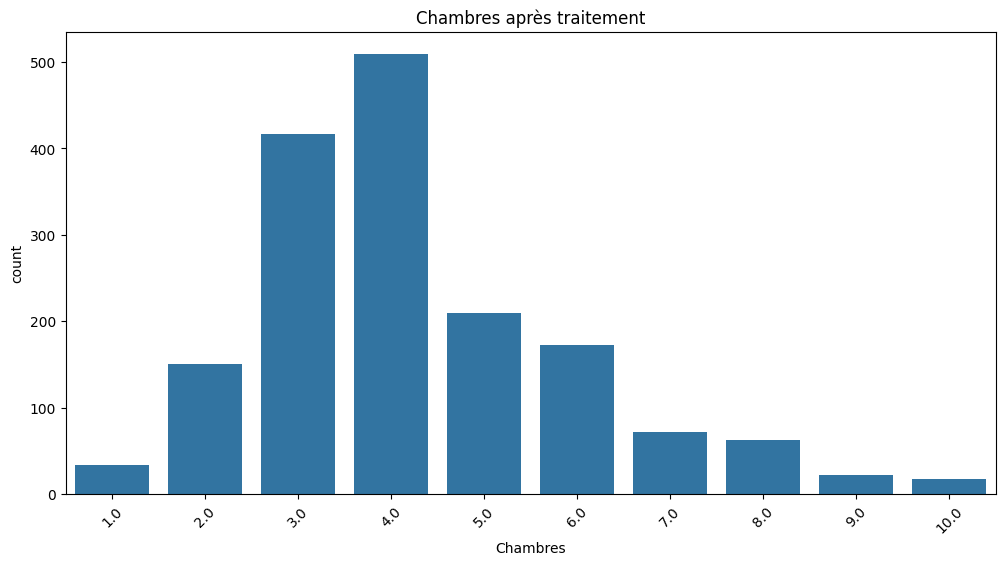

In [14]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Chambres', data=df_cleaned)
plt.title('Chambres après traitement')
plt.xticks(rotation=45)
plt.show()

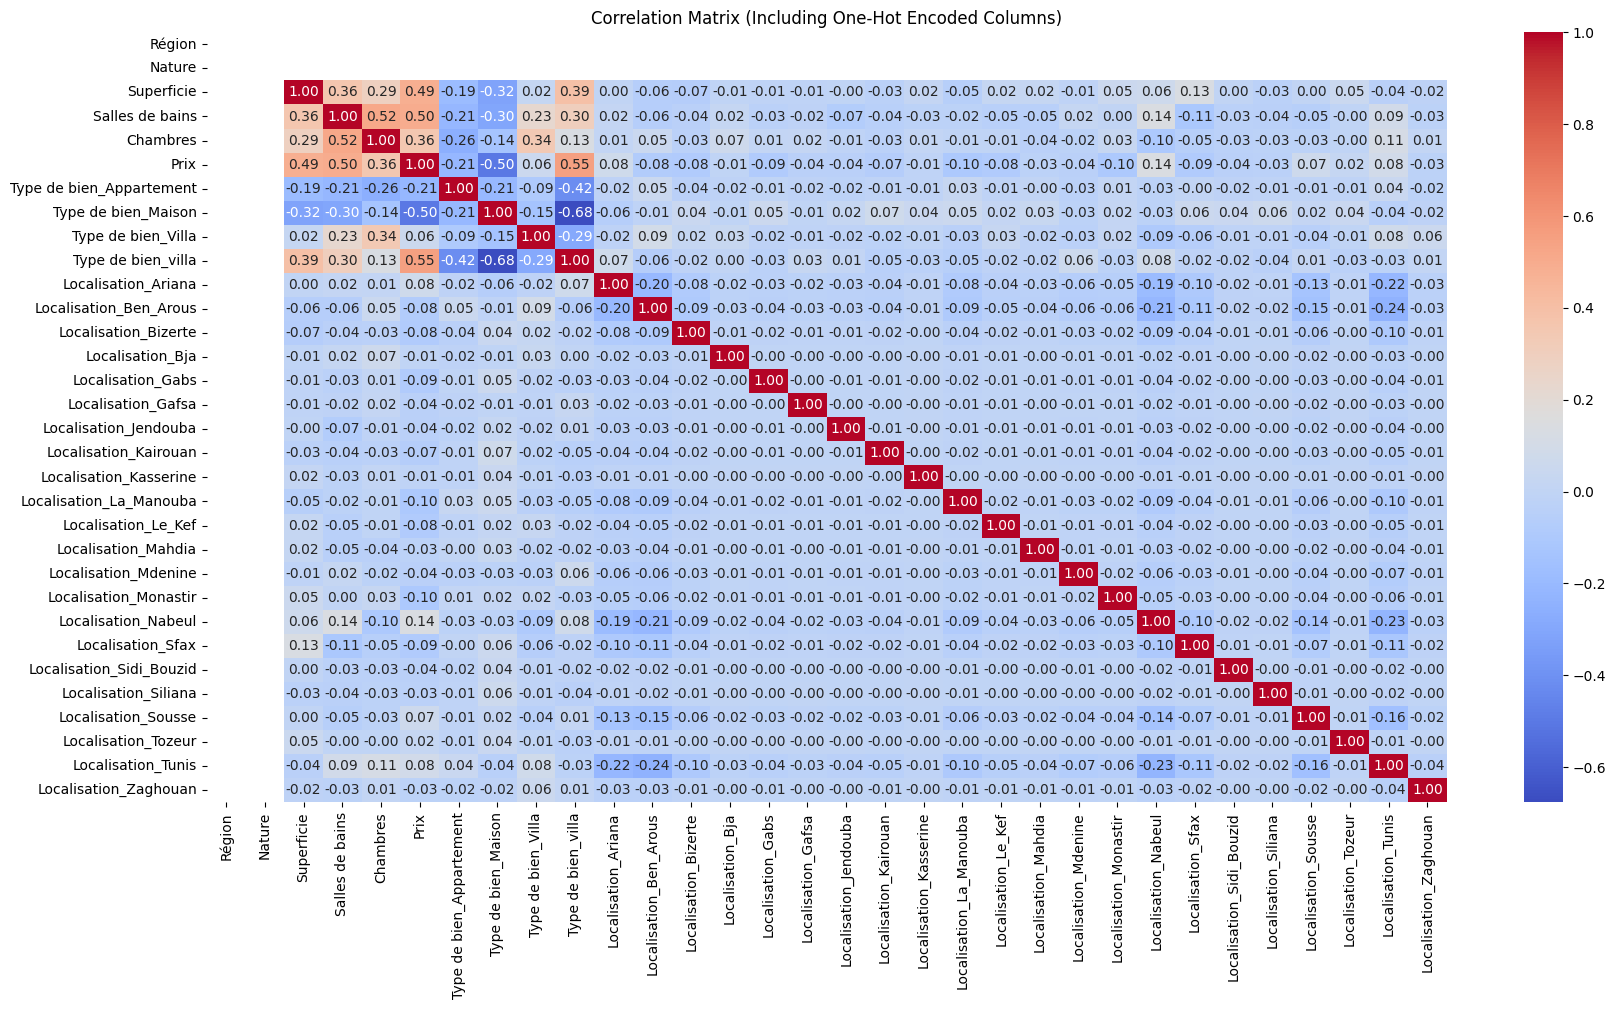

In [15]:
# Apply one-hot encoding to the categorical variables
df_encoded = pd.get_dummies(df_cleaned, columns=['Type de bien', 'Localisation'])

# Convert boolean columns to integers (if applicable)
df_encoded = df_encoded.astype({col: int for col in df_encoded.select_dtypes(include=['bool']).columns})
df_encoded = df_encoded.apply(pd.to_numeric, errors='coerce')

correlation_matrix = df_encoded.corr()

plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix (Including One-Hot Encoded Columns)')
plt.show()

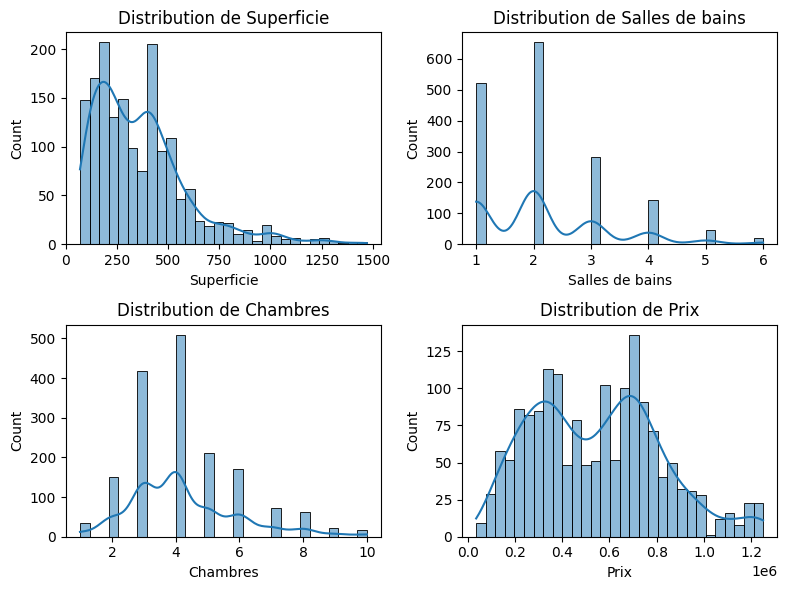

In [16]:
cols_to_normalize = ['Superficie', 'Salles de bains', 'Chambres', 'Prix']
fig, axes = plt.subplots(2, 2, figsize=(8, 6))
axes = axes.flatten()
for i, col in enumerate(cols_to_normalize):
    sns.histplot(df_cleaned[col], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f'Distribution de {col}')
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

<Axes: >

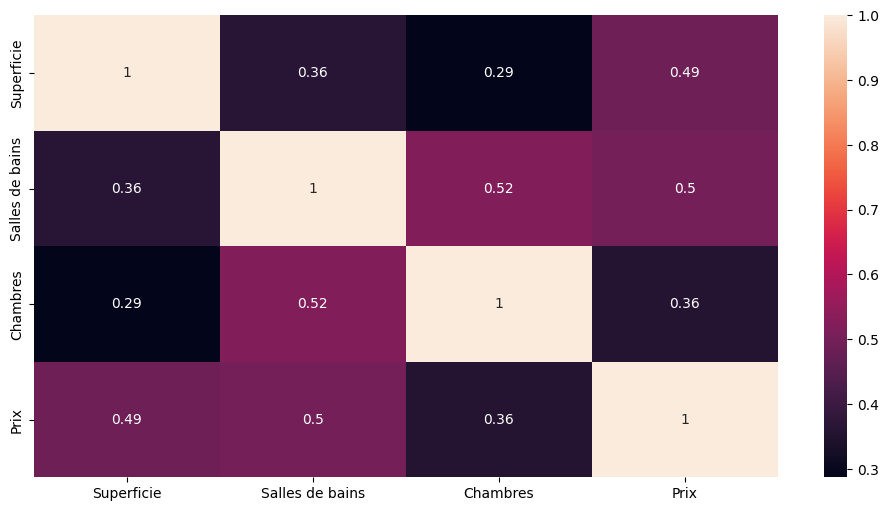

In [22]:
# Select only numerical features for correlation analysis
numerical_dataset = df_cleaned.select_dtypes(include=['number'])

plt.figure(figsize=(12, 6))
sns.heatmap(numerical_dataset.corr(), annot = True)

In [23]:
df_encoded.to_csv('data/final_encoded_data.csv', index=False)